# Phase HW6 solutions

Geol 2460 HW6
11-14-16
@author: Eric Burdette

Solve and plot the regular solution equations for the Enstatite-Diopside solvus, spinodal points, and free energy of mixing vs composition given the phase diagram at ambient pressure:

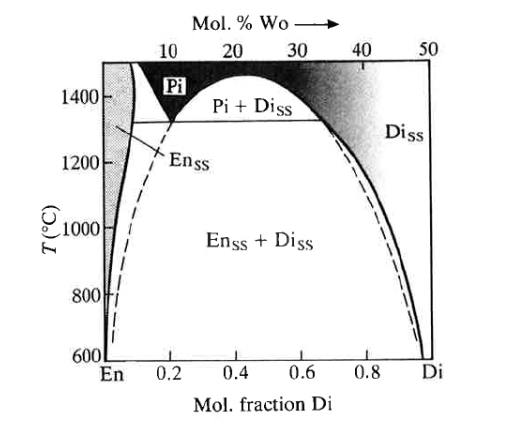

In [7]:
from IPython.display import Image
Image("En-Di_PD.png")
#<img src="En-Di_PD.png">

In [8]:
# first import neccesary modules
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

## Regular Solution Functions

Critical temperature from Phase diagram is ~1457C determined by interpolation.
Define the regular solution functions below:

Mixing energy:
$$
\begin{equation}
\Delta G^{reg} = RT\left( (1-X_{Di})*ln(1-X_{Di}) + (X_{Di})*ln(X_{Di}) \right) + \Omega(1-X_{Di})X_{Di}
\end{equation}
$$

1st derivative:
$$
\begin{equation}
\frac{d\Delta G^{reg}}{dX_{Di}}=0=RT\left( \frac{X_{Di}}{(1-X_{Di})} \right) + \Omega(1-2X_{Di})
\end{equation}
$$

2nd Derivative:
$$
\begin{equation}
\frac{d^{2}\Delta G^{reg}}{dX_{Di}^{2}}=0=RT\left( \frac{1}{(X_{Di})} + \frac{1}{(1-X_{Di})} \right) -2 \Omega \\
\\ 
0= X_{Di}^2 - X_{Di} + \frac{RT}{2 \Omega}
\end{equation}
$$


In [9]:
Tcrit=1457+273 #critical temperature from diagram is ~1457C
Omega=2*8.314*Tcrit #regular solution parameter can be solved for and used for rest of predicitons

Tlist=np.array([1450,1440,1425,1400,1300,1350,1200,1100,1000,800,600])+273 #temperature list to calculate at


def Gmix(Xb,T,omega): # regular solution delta G of mixing
    return 8.314*T*((1-Xb)*np.log(1-Xb)+Xb*np.log(Xb))+omega*Xb*(1-Xb)
    
def spinodal(T,omega): # spinodal points are roots of second derivative
    if T<Tcrit:
        #polynomial is -R*T+2*omega*Xb-2*omega*x^2=0
        roots=np.roots([1,-1,8.314*T/(2*omega)])
        return roots[0],roots[1] 
    else:
        return None

def Gmix_deriv(Xb,T,omega): # First derivative=0 close to either end-member is solvus (solve numerically)
    return 8.314*T*np.log(Xb/(1-Xb))+omega*(1-2*Xb)

## Mixing Free Energy Plot

Compute Equation (1) at specified temperatures (curves are in sequential order from lowest at 1773K to highest at 873K)

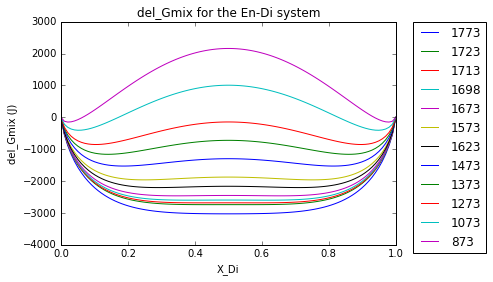

In [10]:
#plot mixing free energies
XbList=np.linspace(1e-5,1-1e-5,100)
plt.plot(XbList,Gmix(XbList,1773,Omega), label='1773')
for T in Tlist:
    GmixT=Gmix(XbList,T,Omega)
    plt.plot(XbList,GmixT, label=str(T))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('del_Gmix for the En-Di system'); plt.xlabel('X_Di'); plt.ylabel('del_Gmix (J)')
plt.show()

## Spinodal/Solvus Calculations, Plot

Solve Equation (4) for the spinodal points

Solve Equation (2) for minima nearest end members

Print data and plot curves

In [11]:
#output solvus/spinodal points for a given temperature
Tspin=[]
xlist_spin=[]
xlist_solv=[]
print('T (K), left sovlus, left spinodal, right spinodal, right solvus')
for T in Tlist:
    sp2,sp1=spinodal(T,Omega)
    solv1=fsolve(Gmix_deriv,x0=0+1e-7,args=(T,Omega))[0] #numerically solve for left solvus
    solv2=fsolve(Gmix_deriv,x0=1-1e-7,args=(T,Omega))[0] #'' for right solvus
    Tspin.append(T);xlist_spin.append(sp1); xlist_solv.append(solv1)
    Tspin.append(T);xlist_spin.append(sp2); xlist_solv.append(solv2)
    print('{:04.0f}'.format(T),','+4*' ','{:01.4f}'.format(solv1),','+6*' ','{:01.4f}'.format(sp1),','+7*' ','{:01.4f}'.format(sp2),','+6*' ','{:01.4f}'.format(solv2))
Tspin.append(Tcrit);xlist_spin.append(0.5); xlist_solv.append(0.5)

T (K), left sovlus, left spinodal, right spinodal, right solvus
1723 ,     0.4450 ,       0.4682 ,        0.5318 ,       0.5550
1713 ,     0.4145 ,       0.4504 ,        0.5496 ,       0.5855
1698 ,     0.3831 ,       0.4320 ,        0.5680 ,       0.6169
1673 ,     0.3449 ,       0.4092 ,        0.5908 ,       0.6551
1573 ,     0.2487 ,       0.3494 ,        0.6506 ,       0.7513
1623 ,     0.2900 ,       0.3757 ,        0.6243 ,       0.7100
1473 ,     0.1866 ,       0.3073 ,        0.6927 ,       0.8134
1373 ,     0.1403 ,       0.2729 ,        0.7271 ,       0.8597
1273 ,     0.1042 ,       0.2430 ,        0.7570 ,       0.8958
1073 ,     0.0530 ,       0.1919 ,        0.8081 ,       0.9470
0873 ,     0.0221 ,       0.1481 ,        0.8519 ,       0.9779


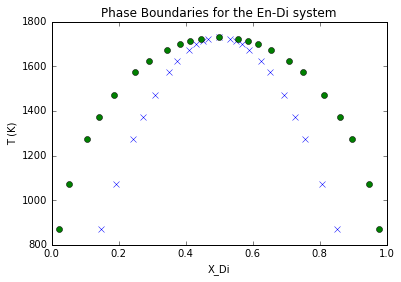

In [12]:
#plot solvus/spinodal points
plt.plot(xlist_spin,Tspin,'x')
plt.plot(xlist_solv,Tspin, 'o')
plt.title('Phase Boundaries for the En-Di system'); plt.xlabel('X_Di'); plt.ylabel('T (K)')
plt.show()